In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# num_workers = 0
# # how many samples per batch to load
# batch_size = 30
# # prepare data loaders
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [3]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# images = images.numpy()
# # get one image from the batch
# img = np.squeeze(images[0])

# fig = plt.figure(figsize = (5,5))
# ax = fig.add_subplot(111)
# ax.imshow(img, cmap='gray')

In [4]:
# Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self, in_channels=1, latent_channels=4):
        super(ConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, latent_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(latent_channels),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_channels, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),

            nn.ConvTranspose2d(16, in_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialize the model
model = ConvAutoencoder()
print(model)


ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): Sigmoid()
  )
)


In [5]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [6]:
# Dataset and DataLoader
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 357kB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.87MB/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [7]:
batch_size = 30
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [8]:
# Training the Autoencoder
n_epochs = 30
for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    model.train()

    for images, _ in train_loader:

        images = images

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Average loss for the epoch
    train_loss = train_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}, Training Loss: {train_loss:.4f}")

Epoch 1, Training Loss: 0.0185
Epoch 2, Training Loss: 0.0067
Epoch 3, Training Loss: 0.0060
Epoch 4, Training Loss: 0.0057
Epoch 5, Training Loss: 0.0056
Epoch 6, Training Loss: 0.0054
Epoch 7, Training Loss: 0.0054
Epoch 8, Training Loss: 0.0053
Epoch 9, Training Loss: 0.0052
Epoch 10, Training Loss: 0.0052
Epoch 11, Training Loss: 0.0052
Epoch 12, Training Loss: 0.0051
Epoch 13, Training Loss: 0.0051
Epoch 14, Training Loss: 0.0051
Epoch 15, Training Loss: 0.0051
Epoch 16, Training Loss: 0.0050
Epoch 17, Training Loss: 0.0050
Epoch 18, Training Loss: 0.0050
Epoch 19, Training Loss: 0.0050
Epoch 20, Training Loss: 0.0050
Epoch 21, Training Loss: 0.0050
Epoch 22, Training Loss: 0.0050
Epoch 23, Training Loss: 0.0049
Epoch 24, Training Loss: 0.0049
Epoch 25, Training Loss: 0.0049
Epoch 26, Training Loss: 0.0049
Epoch 27, Training Loss: 0.0049
Epoch 28, Training Loss: 0.0049
Epoch 29, Training Loss: 0.0049
Epoch 30, Training Loss: 0.0049


In [9]:
# Visualizing Original and Reconstructed Images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get sample outputs
output = model(images)

# Prep images for display
images = images.numpy()
output = output.view(batch_size, 1, 28, 28).detach().numpy()


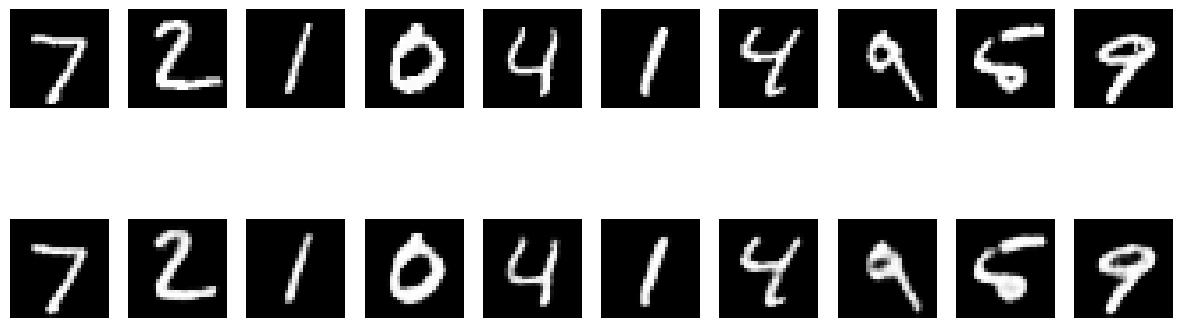

In [10]:
# Plot original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i in range(10):

    ax = axes[0, i]
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.axis('off')

    ax = axes[1, i]
    ax.imshow(np.squeeze(output[i]), cmap='gray')
    ax.axis('off')

plt.show()